# Latex Headers

Latex headers are below:

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

In [2]:
width = 70 #Width as a percentage of the screen

from IPython.display import display, HTML
display(HTML("<style>.jp-CodeCell .jp-Cell-inputWrapper { width: "+str(width)+"% !important;  margin: 0 auto; }</style>"))
display(HTML("<style>.jp-MarkdownCell .jp-Cell-inputWrapper { width: "+str(width)+"% !important;  margin: 0 auto; }</style>"))
display(HTML("<style>.jp-Cell-outputWrapper { width: "+str(width)+"% !important;  margin: 0 auto; }</style>"))

# Headers and Functions (Run First!)

 - Import all headers needed for the simulations in this notebook.  
 - This cell MUST be run first or none of the code below will work. 
 - We also define the convenience function `loadFields` for loading the simulated field data provided

In [3]:
%reset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import physical_constants_atomic as pca
import physical_constants_SI as pcSI
import emission_rate_functions as FN
import pulse_functions as pulses
import data_load_functions as load
import scipy.interpolate as interpolate
from scipy.signal import savgol_filter
from scipy.signal import tukey
from scipy.signal import spectrogram
from scipy.signal import stft

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


## Load Data and Relevant Settings

In [4]:
#-- Load key simulation parameters and generated current data --
harm_start = 2
harm_end = 32


# -- 2-um Parameters for Data Load
w0 = 0.023 #Angular frequency of drive (atomic units)
BG = 3.3 #Bandgap in eV


# -- For loading 2.3-um Drive Data -- 
# w0 = 0.020 #Angular frequency of drive (atomic units)
# folder = './SIMULATION-DATA/TDDFT-MODELS/BG-3.3eV-2.3-um-drive/Reference_omega_0.020_n_30_f_' + F_peak_string

#-- Now load the data and process it... this is the same for each file
F_peak_string = '0.001067605'
folder = './SIMULATION-DATA/TDDFT-MODELS/BG-3.3eV-2-um-drive/Reference_f_' + F_peak_string + '_n_30'
F_peak = float(F_peak_string)
tddft_data_2_low = load.loadTDDFTData(w0, F_peak, folder)
t_2_low = tddft_data_2_low['t']
t_2_low_fs = t_2_low*1e15/pca.tcon #time in fs for convenience
J_2_low = tddft_data_2_low['J']

#Now we want to load the corresponding semiclassical data 
#for the low-intensity case with the 2-um driver.
filename = './SIMULATION-DATA/Semiclassical model with TDDFT bandstructure/2-um F=0.001067605/Time_and_current.txt'
t_2_low_semi_data = load.loadCurrents(filename)
t_2_low_semi = np.squeeze(t_2_low_semi_data['t'])
t_2_low_semi_fs = t_2_low_semi*1e15/pca.tcon #time in fs for convenience
J_2_low_semi = np.squeeze(t_2_low_semi_data['Jz'])
F_data_2_low_semi = load.currentsToFields(w0, t_2_low_semi, J_2_low_semi)

#-- Now load the data and process it... this is the same for each file
F_peak_string = '0.001193619'
folder = './SIMULATION-DATA/TDDFT-MODELS/BG-3.3eV-2-um-drive/Reference_f_' + F_peak_string + '_n_30'
F_peak = float(F_peak_string)
tddft_data_2_high = load.loadTDDFTData(w0, F_peak, folder)
t_2_high = tddft_data_2_high['t']
t_2_high_fs = t_2_high*1e15/pca.tcon #time in fs for convenience
J_2_high = tddft_data_2_high['J']


#-- Now load the data and process it... this is the same for each file
w0 = 0.020 #Angular frequency of drive (atomic units)
F_peak_string = '0.001067605'
folder = './SIMULATION-DATA/TDDFT-MODELS/BG-3.3eV-2.3-um-drive/Reference_omega_0.020_n_30_f_' + F_peak_string
F_peak = float(F_peak_string)
tddft_data_2p3_low = load.loadTDDFTData(w0, F_peak, folder)
t_2p3_low = tddft_data_2p3_low['t']
t_2p3_low_fs = t_2p3_low*1e15/pca.tcon #time in fs for convenience
J_2p3_low = tddft_data_2p3_low['J']


#Cut a spectral region for analysis
# F_gen_region, F_gen_region_f = load.cutSpectralRegion(tddft_data['w_norm'], tddft_data['F_gen_f'], harm_start, harm_end)

# display('Intensity ' + '{:.2e}'.format(tddft_data['I_peak_W_cm2']) + ' W/cm^2')

## TDDFT Spectra Comparison

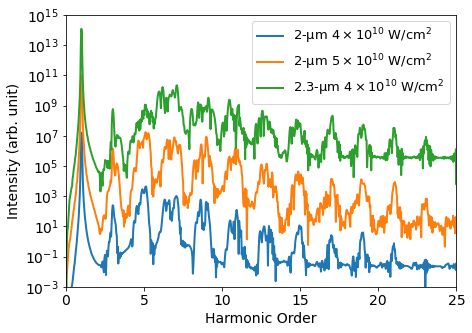

In [5]:
fig = plt.figure()
fig.set_size_inches(7, 5)


#Semiclassical data for comparison...
# plt.semilogy(F_data_2_low_semi['w_norm'], 
#              np.abs(F_data_2_low_semi['F_gen_f'])**2*700,
#             label=u'2-\u03BCm' + r' $4\times10^{10}$ W/cm${}^2$',
#             linewidth=2.0)

plt.semilogy(tddft_data_2_low['w_norm'], 
             np.abs(tddft_data_2_low['F_gen_f'])**2,
            label=u'2-\u03BCm' + r' $4\times10^{10}$ W/cm${}^2$',
            linewidth=2.0)



plt.semilogy(tddft_data_2_high['w_norm'], 
             np.abs(tddft_data_2_high['F_gen_f'])**2*5000, 
            label=u'2-\u03BCm' + r' $5\times10^{10}$ W/cm${}^2$',
            linewidth=2.0)

plt.semilogy(tddft_data_2p3_low['w_norm'], 
             np.abs(tddft_data_2p3_low['F_gen_f'])**2*5e6,
            label=u'2.3-\u03BCm' + r' $4\times10^{10}$ W/cm${}^2$',
            linewidth=2.0)

plt.xlim(0, 25)
plt.xlabel('Harmonic Order', fontsize=14)
plt.ylabel('Intensity (arb. unit)', fontsize=14)
plt.ylim(1e-3, 1e15)
plt.legend(fontsize=13)
plt.tick_params(labelsize=14)

plt.savefig('spectra.pdf', bbox_inches='tight')

## Time-Domain Fields

Comparison of the nonlinear fields in the time-domain.  These HH fields are those from the chosen spectral region above.  

For comparison, they are shown against both the vector potential and electric field of the driving waveform.

### 2-um -- 4e10 W/cm2

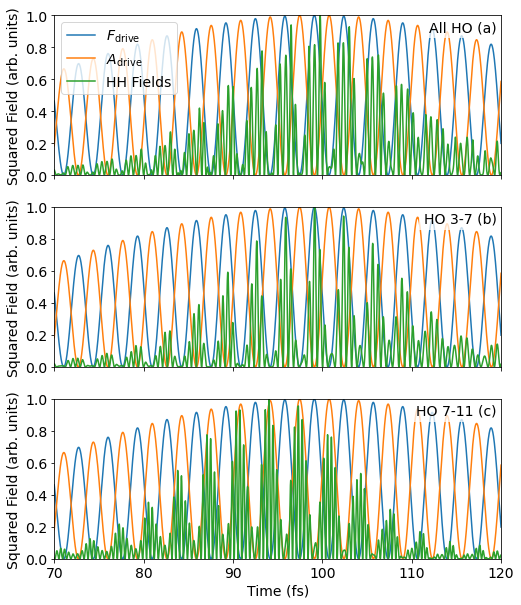

In [6]:
fig = plt.figure()
fig.set_size_inches(8, 10)

# -- All Harmonics -- 
ax1 = fig.add_subplot(3, 1, 1)

ax1.plot(tddft_data_2_low['t_drive']*1e15/pca.tcon, 
         tddft_data_2_low['F_drive']**2, 
         label=r'$F_\mathrm{drive}$')
ax1.plot(tddft_data_2_low['t_drive']*1e15/pca.tcon, 
         tddft_data_2_low['A_drive']**2, 
         label=r'$A_\mathrm{drive}$')
# ax1.plot(tddft_data_2_low['t']*1e15/pca.tcon, (tddft_data_2_low['F_gen']/tddft_data_2_low['F_gen'].max())**2)

harm_start = 2
harm_end = 40
F_gen_region, F_gen_region_f = load.cutSpectralRegion(tddft_data_2_low['w_norm'], 
                                                    tddft_data_2_low['F_gen_f'], 
                                                    harm_start, harm_end)
ax1.plot(t_2_low_fs, (F_gen_region/np.abs(F_gen_region).max())**2, label='HH Fields')

#Labeling and look
plt.text(0.99, 0.925, 'All HO (a)', 
         horizontalalignment='right',
         verticalalignment='center', 
         transform=ax1.transAxes,
         fontsize=14,
         bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))
plt.legend(fontsize=14, loc='upper left')
plt.ylabel('Squared Field (arb. units)', fontsize=14)
plt.tick_params(labelsize=14)
plt.tick_params('x', labelbottom=False)
plt.xlim(70, 120)
plt.ylim(0, 1)

# -- HO 3-7 -- 
ax2 = fig.add_subplot(3, 1, 2)

ax2.plot(tddft_data_2_low['t_drive']*1e15/pca.tcon, 
         tddft_data_2_low['F_drive']**2, 
         label=r'$F_\mathrm{drive}$')
ax2.plot(tddft_data_2_low['t_drive']*1e15/pca.tcon, 
         tddft_data_2_low['A_drive']**2, 
         label=r'$A_\mathrm{drive}$')
# ax1.plot(tddft_data_2_low['t']*1e15/pca.tcon, (tddft_data_2_low['F_gen']/tddft_data_2_low['F_gen'].max())**2)

harm_start = 2
harm_end = 8
F_gen_region, F_gen_region_f = load.cutSpectralRegion(tddft_data_2_low['w_norm'], 
                                                    tddft_data_2_low['F_gen_f'], 
                                                    harm_start, harm_end)
ax2.plot(t_2_low_fs, (F_gen_region/np.abs(F_gen_region).max())**2, label='HH Fields')

#Labeling and look
plt.text(0.99, 0.925, 'HO 3-7 (b)', 
         horizontalalignment='right',
         verticalalignment='center', 
         transform=ax2.transAxes,
         fontsize=14,
         bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))
plt.ylabel('Squared Field (arb. units)', fontsize=14)
plt.tick_params(labelsize=14)
plt.xlim(70, 120)
plt.ylim(0, 1)
plt.tick_params('x', labelbottom=False)

# -- HO 7-11 -- 
ax3 = fig.add_subplot(3, 1, 3)

ax3.plot(tddft_data_2_low['t_drive']*1e15/pca.tcon, 
         tddft_data_2_low['F_drive']**2, 
         label=r'$F_\mathrm{drive}$')
ax3.plot(tddft_data_2_low['t_drive']*1e15/pca.tcon, 
         tddft_data_2_low['A_drive']**2, 
         label=r'$A_\mathrm{drive}$')
# ax1.plot(tddft_data_2_low['t']*1e15/pca.tcon, (tddft_data_2_low['F_gen']/tddft_data_2_low['F_gen'].max())**2)

harm_start = 6
harm_end = 12
F_gen_region, F_gen_region_f = load.cutSpectralRegion(tddft_data_2_low['w_norm'], 
                                                    tddft_data_2_low['F_gen_f'], 
                                                    harm_start, harm_end)
ax3.plot(t_2_low_fs, (F_gen_region/np.abs(F_gen_region).max())**2, label='HH Fields')

#Labeling and look
plt.text(0.99, 0.925, 'HO 7-11 (c)', 
         horizontalalignment='right',
         verticalalignment='center', 
         transform=ax3.transAxes,
         fontsize=14,
         bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))
plt.xlabel('Time (fs)', fontsize=14)
plt.ylabel('Squared Field (arb. units)', fontsize=14)
plt.tick_params(labelsize=14)
plt.xlim(70, 120)
plt.ylim(0, 1);

plt.savefig('time-domain-2-um-low.pdf', bbox_inches='tight');

### 2-um -- 5e10 W/cm2

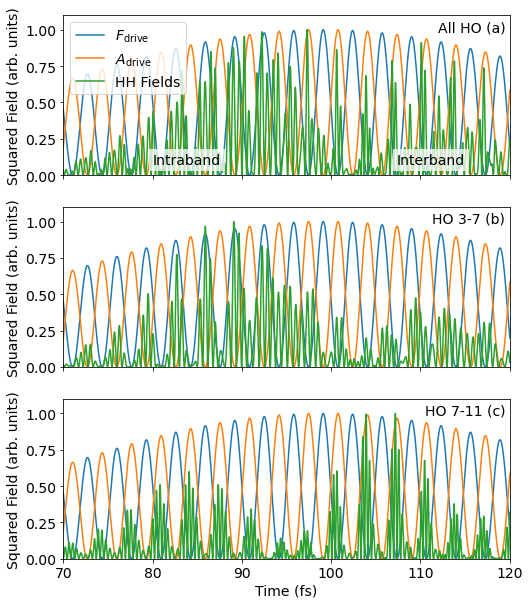

In [7]:
fig = plt.figure()
fig.set_size_inches(8, 10)

# -- All Harmonics -- 
ax1 = fig.add_subplot(3, 1, 1)

ax1.plot(tddft_data_2_high['t_drive']*1e15/pca.tcon, 
         tddft_data_2_high['F_drive']**2, 
         label=r'$F_\mathrm{drive}$')
ax1.plot(tddft_data_2_high['t_drive']*1e15/pca.tcon, 
         tddft_data_2_high['A_drive']**2, 
         label=r'$A_\mathrm{drive}$')
# ax1.plot(tddft_data_2_high['t']*1e15/pca.tcon, (tddft_data_2_high['F_gen']/tddft_data_2_high['F_gen'].max())**2)

harm_start = 2
harm_end = 40
F_gen_region, F_gen_region_f = load.cutSpectralRegion(tddft_data_2_high['w_norm'], 
                                                    tddft_data_2_high['F_gen_f'], 
                                                    harm_start, harm_end)
ax1.plot(t_2_high_fs, (F_gen_region/np.abs(F_gen_region).max())**2, label='HH Fields')

#Labeling and look
plt.text(0.99, 0.925, 'All HO (a)', 
         horizontalalignment='right',
         verticalalignment='center', 
         transform=ax1.transAxes,
         fontsize=14,
         bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))
plt.text(0.20, 0.05, 'Intraband', 
         horizontalalignment='left',
         verticalalignment='bottom', 
         transform=ax1.transAxes,
         fontsize=14,
         bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))
plt.text(0.90, 0.05, 'Interband', 
         horizontalalignment='right',
         verticalalignment='bottom', 
         transform=ax1.transAxes,
         fontsize=14,
         bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))
plt.legend(fontsize=14, loc='upper left')
plt.ylabel('Squared Field (arb. units)', fontsize=14)
plt.tick_params(labelsize=14)
plt.tick_params('x', labelbottom=False)
plt.xlim(70, 120)
plt.ylim(0, 1.1)

# -- HO 3-7 -- 
ax2 = fig.add_subplot(3, 1, 2)

ax2.plot(tddft_data_2_high['t_drive']*1e15/pca.tcon, 
         tddft_data_2_high['F_drive']**2, 
         label=r'$F_\mathrm{drive}$')
ax2.plot(tddft_data_2_high['t_drive']*1e15/pca.tcon, 
         tddft_data_2_high['A_drive']**2, 
         label=r'$A_\mathrm{drive}$')
# ax1.plot(tddft_data_2_high['t']*1e15/pca.tcon, (tddft_data_2_high['F_gen']/tddft_data_2_high['F_gen'].max())**2)

harm_start = 2
harm_end = 8
F_gen_region, F_gen_region_f = load.cutSpectralRegion(tddft_data_2_high['w_norm'], 
                                                    tddft_data_2_high['F_gen_f'], 
                                                    harm_start, harm_end)
ax2.plot(t_2_high_fs, (F_gen_region/np.abs(F_gen_region).max())**2, label='HH Fields')

#Labeling and look
plt.text(0.99, 0.925, 'HO 3-7 (b)', 
         horizontalalignment='right',
         verticalalignment='center', 
         transform=ax2.transAxes,
         fontsize=14,
         bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))
plt.ylabel('Squared Field (arb. units)', fontsize=14)
plt.tick_params(labelsize=14)
plt.xlim(70, 120)
plt.ylim(0, 1.1)
plt.tick_params('x', labelbottom=False)

# -- HO 7-11 -- 
ax3 = fig.add_subplot(3, 1, 3)

ax3.plot(tddft_data_2_high['t_drive']*1e15/pca.tcon, 
         tddft_data_2_high['F_drive']**2, 
         label=r'$F_\mathrm{drive}$')
ax3.plot(tddft_data_2_high['t_drive']*1e15/pca.tcon, 
         tddft_data_2_high['A_drive']**2, 
         label=r'$A_\mathrm{drive}$')
# ax1.plot(tddft_data_2_high['t']*1e15/pca.tcon, (tddft_data_2_high['F_gen']/tddft_data_2_high['F_gen'].max())**2)

harm_start = 6
harm_end = 12
F_gen_region, F_gen_region_f = load.cutSpectralRegion(tddft_data_2_high['w_norm'], 
                                                    tddft_data_2_high['F_gen_f'], 
                                                    harm_start, harm_end)
ax3.plot(t_2_high_fs, (F_gen_region/np.abs(F_gen_region).max())**2, label='HH Fields')

#Labeling and look
plt.text(0.99, 0.925, 'HO 7-11 (c)', 
         horizontalalignment='right',
         verticalalignment='center', 
         transform=ax3.transAxes,
         fontsize=14,
         bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))
plt.xlabel('Time (fs)', fontsize=14)
plt.ylabel('Squared Field (arb. units)', fontsize=14)
plt.tick_params(labelsize=14)
plt.xlim(70, 120)
plt.ylim(0, 1.1);

plt.savefig('time-domain-2-um-high.pdf', bbox_inches='tight');

### 2.3-um -- 4e10 W/cm2

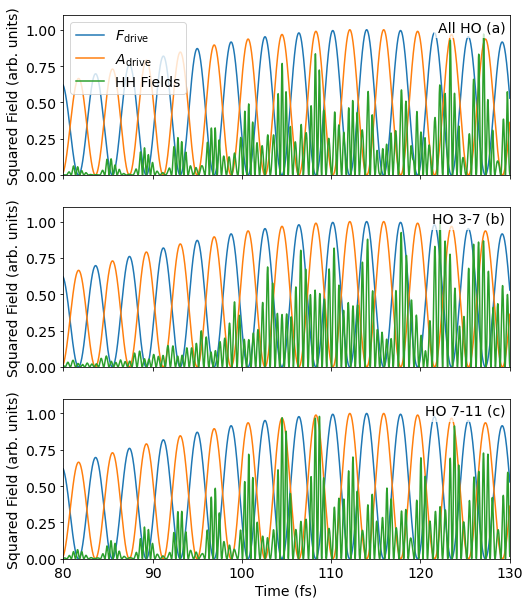

In [8]:
fig = plt.figure()
fig.set_size_inches(8, 10)

# -- All Harmonics -- 
ax1 = fig.add_subplot(3, 1, 1)

ax1.plot(tddft_data_2p3_low['t_drive']*1e15/pca.tcon, 
         tddft_data_2p3_low['F_drive']**2, 
         label=r'$F_\mathrm{drive}$')
ax1.plot(tddft_data_2p3_low['t_drive']*1e15/pca.tcon, 
         tddft_data_2p3_low['A_drive']**2, 
         label=r'$A_\mathrm{drive}$')
# ax1.plot(tddft_data_2p3_low['t']*1e15/pca.tcon, (tddft_data_2p3_low['F_gen']/tddft_data_2p3_low['F_gen'].max())**2)

harm_start = 2
harm_end = 40
F_gen_region, F_gen_region_f = load.cutSpectralRegion(tddft_data_2p3_low['w_norm'], 
                                                    tddft_data_2p3_low['F_gen_f'], 
                                                    harm_start, harm_end)
ax1.plot(t_2p3_low_fs, (F_gen_region/np.abs(F_gen_region).max())**2, label='HH Fields')

#Labeling and look
plt.text(0.99, 0.925, 'All HO (a)', 
         horizontalalignment='right',
         verticalalignment='center', 
         transform=ax1.transAxes,
         fontsize=14,
         bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))
plt.legend(fontsize=14, loc='upper left')
plt.ylabel('Squared Field (arb. units)', fontsize=14)
plt.tick_params(labelsize=14)
plt.tick_params('x', labelbottom=False)
plt.xlim(80, 130)
plt.ylim(0, 1.1)

# -- HO 3-7 -- 
ax2 = fig.add_subplot(3, 1, 2)

ax2.plot(tddft_data_2p3_low['t_drive']*1e15/pca.tcon, 
         tddft_data_2p3_low['F_drive']**2, 
         label=r'$F_\mathrm{drive}$')
ax2.plot(tddft_data_2p3_low['t_drive']*1e15/pca.tcon, 
         tddft_data_2p3_low['A_drive']**2, 
         label=r'$A_\mathrm{drive}$')
# ax1.plot(tddft_data_2p3_low['t']*1e15/pca.tcon, (tddft_data_2p3_low['F_gen']/tddft_data_2p3_low['F_gen'].max())**2)

harm_start = 2
harm_end = 8
F_gen_region, F_gen_region_f = load.cutSpectralRegion(tddft_data_2p3_low['w_norm'], 
                                                    tddft_data_2p3_low['F_gen_f'], 
                                                    harm_start, harm_end)
ax2.plot(t_2p3_low_fs, (F_gen_region/np.abs(F_gen_region).max())**2, label='HH Fields')

#Labeling and look
plt.text(0.99, 0.925, 'HO 3-7 (b)', 
         horizontalalignment='right',
         verticalalignment='center', 
         transform=ax2.transAxes,
         fontsize=14,
         bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))
plt.ylabel('Squared Field (arb. units)', fontsize=14)
plt.tick_params(labelsize=14)
plt.xlim(80, 130)
plt.ylim(0, 1.1)
plt.tick_params('x', labelbottom=False)

# -- HO 7-11 -- 
ax3 = fig.add_subplot(3, 1, 3)

ax3.plot(tddft_data_2p3_low['t_drive']*1e15/pca.tcon, 
         tddft_data_2p3_low['F_drive']**2, 
         label=r'$F_\mathrm{drive}$')
ax3.plot(tddft_data_2p3_low['t_drive']*1e15/pca.tcon, 
         tddft_data_2p3_low['A_drive']**2, 
         label=r'$A_\mathrm{drive}$')
# ax1.plot(tddft_data_2p3_low['t']*1e15/pca.tcon, (tddft_data_2p3_low['F_gen']/tddft_data_2p3_low['F_gen'].max())**2)

harm_start = 6
harm_end = 12
F_gen_region, F_gen_region_f = load.cutSpectralRegion(tddft_data_2p3_low['w_norm'], 
                                                    tddft_data_2p3_low['F_gen_f'], 
                                                    harm_start, harm_end)
ax3.plot(t_2p3_low_fs, (F_gen_region/np.abs(F_gen_region).max())**2, label='HH Fields')

#Labeling and look
plt.text(0.99, 0.925, 'HO 7-11 (c)', 
         horizontalalignment='right',
         verticalalignment='center', 
         transform=ax3.transAxes,
         fontsize=14,
         bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))
plt.xlabel('Time (fs)', fontsize=14)
plt.ylabel('Squared Field (arb. units)', fontsize=14)
plt.tick_params(labelsize=14)
plt.xlim(80, 130)
plt.ylim(0, 1.1);

plt.savefig('time-domain-2p3-um-low.pdf', bbox_inches='tight');

## Comparison of TDDFT with Semiclassical Model

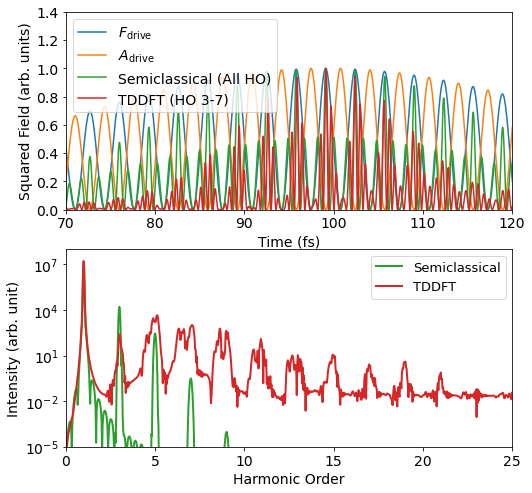

In [9]:
fig = plt.figure()
fig.set_size_inches(8, 8)

# -- All Harmonics -- 
ax1 = fig.add_subplot(2, 1, 1)

ax1.plot(tddft_data_2_low['t_drive']*1e15/pca.tcon, 
         tddft_data_2_low['F_drive']**2, 
         label=r'$F_\mathrm{drive}$')
ax1.plot(tddft_data_2_low['t_drive']*1e15/pca.tcon, 
         tddft_data_2_low['A_drive']**2, 
         label=r'$A_\mathrm{drive}$')
# ax1.plot(tddft_data_2_low['t']*1e15/pca.tcon, (tddft_data_2_low['F_gen']/tddft_data_2_low['F_gen'].max())**2)

harm_start = 2
harm_end = 40
F_gen_region, F_gen_region_f = load.cutSpectralRegion(F_data_2_low_semi['w_norm'], 
                                                    F_data_2_low_semi['F_gen_f'], 
                                                    harm_start, harm_end)
ax1.plot(t_2_low_semi_fs, (F_gen_region/np.abs(F_gen_region).max())**2, label='Semiclassical (All HO)')

harm_start = 2
harm_end = 8
F_gen_region, F_gen_region_f = load.cutSpectralRegion(tddft_data_2_low['w_norm'], 
                                                    tddft_data_2_low['F_gen_f'], 
                                                    harm_start, harm_end)
ax1.plot(t_2_low_fs, (F_gen_region/np.abs(F_gen_region).max())**2, label='TDDFT (HO 3-7)')

#Labeling and look
plt.legend(fontsize=14, loc='upper left')
plt.ylabel('Squared Field (arb. units)', fontsize=14)
plt.xlabel('Time (fs)', fontsize=14)
plt.tick_params(labelsize=14)
plt.xlim(70, 120)
plt.ylim(0, 1.4)

# -- HO 3-7 -- 
ax2 = fig.add_subplot(2, 1, 2)

#Semiclassical data for comparison...
ax2.semilogy(F_data_2_low_semi['w_norm'], 
             np.abs(F_data_2_low_semi['F_gen_f'])**2*700,
            label=u'Semiclassical',
             color='tab:green',
            linewidth=2.0)

ax2.semilogy(tddft_data_2_low['w_norm'], 
             np.abs(tddft_data_2_low['F_gen_f'])**2,
            label=u'TDDFT',
             color='tab:red',
            linewidth=2.0)

plt.xlim(0, 25)
plt.xlabel('Harmonic Order', fontsize=14)
plt.ylabel('Intensity (arb. unit)', fontsize=14)
plt.ylim(1e-5, 1e8)
plt.legend(fontsize=13)
plt.tick_params(labelsize=14)


plt.savefig('tddft-semiclassical-comparison-2-um-low.pdf', bbox_inches='tight');

## Sampling Simulations and Analysis

The purpose of the following is to compare the actual fields to the result one would obtain via sampling.

Currently the sampled response assumes a flat bandwidth response from the antenna.  We know this is not true, but can be further corrected for in a similar way to the spectral correction below.  

First we need to calculate the cross correlation of the current response of the sampler.

In [10]:
# -- Pulse Information -- 

harm_start = 2
harm_end = 40
F_gen_region, F_gen_region_f = load.cutSpectralRegion(tddft_data_2_high['w_norm'], 
                                                    tddft_data_2_high['F_gen_f'], 
                                                    harm_start, harm_end)

w0 = 0.023 #Angular frequency of drive (atomic units)

t_fs = t_2_high_fs
t = t_2_high

#Driving pulse and parameters
dt_fs = t_fs[1] - t_fs[0]
t_drive = np.arange(-200, 200, dt_fs) #time axis for driver
wc_drive = w0*pca.tcon*1e-15 #Central frequency (rad/fs)
fwhm_drive = 15 #FWHM in femtoseconds of the driver pulse
phi_ce_drive = np.pi #Carrier envelope phase (rad)

# -- Sampling Parameters -- 
tau_range = np.arange(-60, 150, 0.1) #Delay range (fs)
J = np.zeros(tau_range.shape) # Vector for output current density

F_max = 7 #Maximum driver field (V/nm)
phi = 5.1 #Work function of electron emitter (eV)

sample_factor = 1e-4 #Field ratio between HHG and driver
F_0 = 0.0; #DC bias field value (V/nm)

# -- End Settings -- 

# -- Calcualations and Preparation for Cross-Correlation --

#Zero-pad the harmonic pulse to be the same length as the driving pulse
#for the cross-correlation calculation below.
del_length = t_drive.size - F_gen_region.size
del_length_left = int(np.ceil(del_length/2.0))
del_length_right = int(np.floor(del_length/2.0))

F_gen_region_pad = np.zeros(t_drive.shape)
F_gen_region_pad = np.pad(F_gen_region/F_gen_region.max(),
                          (del_length_left, del_length_right))
    
# -- Cross-Correlation Loop --
J_corr = np.zeros(tau_range.shape)

k = 0
for tau in tau_range:
    
    #Create the drive pulse
    drive_pulse = pulses.cos2pulse(t_drive - tau,
                                   fwhm_drive,
                                   wc_drive,
                                   phi_ce_drive)
 

    J_corr[k] = np.trapz(t_drive,
                   FN.J_FN_SI(F_0 + F_max*drive_pulse['E']  +
                              sample_factor*F_gen_region_pad,
                              phi))
    
    k = k + 1

#Remove the background current to extract
#only the cross-correlation current of interest. 
J_corr = J_corr - J_corr[0]

Next we plot the raw small-signal current modulation against the actual signal.

Text(0, 0.5, 'Harmonic Field/Sampler Output (arb. units)')

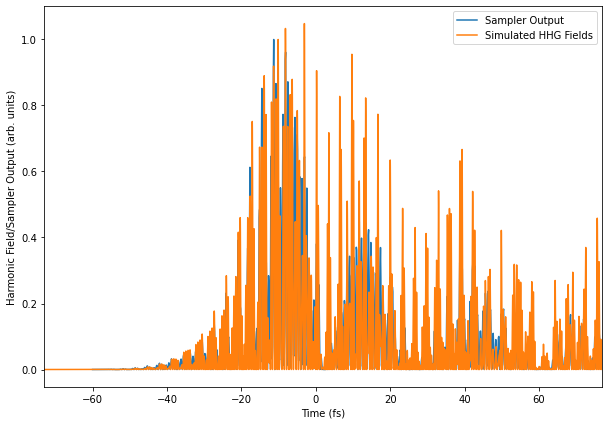

In [11]:
# -- Compare the correlation current with the harmonic signal of interest:
fig = plt.figure()
fig.set_size_inches(10, 7)
ax = []
t_cycle_centered = 2
t_range = 150

t_fs_centered = t_fs - (t_fs[-1] + t_fs[0])/2.0

ax.append(fig.add_subplot(1, 1, 1))
ax[0].plot(tau_range, (J_corr/J_corr.max())**2, label='Sampler Output')
ax[0].plot(t_fs_centered, (F_gen_region/F_gen_region.max())**2, label='Simulated HHG Fields')
ax[0].set_xlim(t_cycle_centered - t_range/2.0, t_cycle_centered + t_range/2.0)
ax[0].legend()
ax[0].set_xlabel('Time (fs)')
ax[0].set_ylabel('Harmonic Field/Sampler Output (arb. units)')

Next we plot the sampler bandwith response...

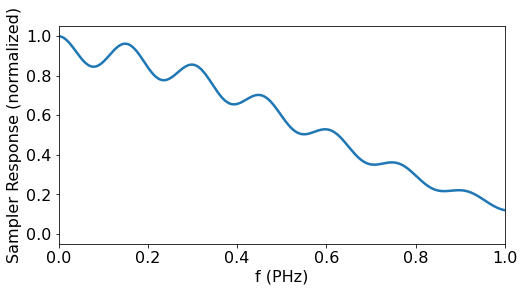

In [12]:
# -- Get frequency representation of each pulse --
#  - Note the suffix _f denotes fourier-transformed version of the variable.

#Cross-correlation current:
dt_J_corr = tau_range[1] - tau_range[0]
w_J_corr = np.fft.fftfreq(tau_range.size, d=dt_J_corr)*2*np.pi
w_J_corr = np.fft.fftshift(w_J_corr)
J_corr_f = np.fft.fft(J_corr)
J_corr_f = np.fft.fftshift(J_corr_f)

#Generated field data
# -- unfortunately above we took single-sided spectra, so to make it match
# -- up here we need the double-sided FT data...
w_simulation = np.fft.fftfreq(t.size, d=dt_fs)*2*np.pi
w_simulation = np.fft.fftshift(w_simulation)
simulation_f = np.fft.fft(F_gen_region)
simulation_f = np.fft.fftshift(simulation_f)

#Driving pulse
dt_drive = t_drive[1] - t_drive[0]
drive_pulse = pulses.cos2pulse(t_drive,
                               fwhm_drive,
                               wc_drive,
                               phi_ce_drive)
w_drive = np.fft.fftfreq(t_drive.size, d=dt_drive)*2*np.pi
w_drive = np.fft.fftshift(w_drive)
dJ_dF_drive = FN.dJ_dF_FN_SI(F_max*drive_pulse['E'] + F_0, phi)
J_drive = FN.J_FN_SI(F_max*drive_pulse['E'] + F_0, phi)
H_sampler = np.fft.fft(np.fft.fftshift(dJ_dF_drive)) #Transfer function of the sampler
H_sampler = np.fft.fftshift(H_sampler)
H_sampler = H_sampler/np.max(np.abs(H_sampler))

# -- Plot the sampler transfer-function: H_sampler
fig = plt.figure()
fig.set_size_inches(8, 4)

plt.plot(w_drive/np.pi/2, np.abs(H_sampler), linewidth=2.5)
plt.xlim(0, 1)
plt.xlabel('f (PHz)', fontsize=16)
plt.ylabel('Sampler Response (normalized)', fontsize=16)
plt.tick_params(labelsize=16)

fig.savefig('sampler-bandwidth-response.pdf', bbox_inches='tight')

... and time-domain response.

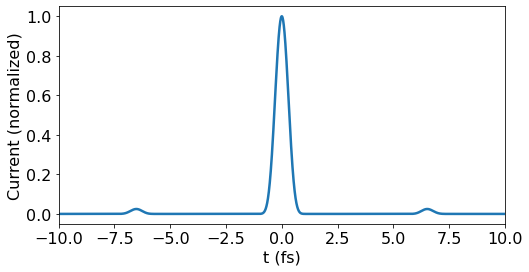

In [13]:
fig = plt.figure()
fig.set_size_inches(8, 4)

plt.plot(t_drive, J_drive/J_drive.max(), linewidth=2.5)
plt.xlabel('t (fs)', fontsize=16)
plt.ylabel('Current (normalized)', fontsize=16)
plt.tick_params(labelsize=16)
plt.xlim(-10, 10)
fig.savefig('sampler-current-response.pdf', bbox_inches='tight')

### Correct the Sampled Waveform

We correct the response by removing the amplitude envelope of the finite bandwidth response of the sampler due to the emission response.  

Again, if the antenna itself has a finite bandwidth, this could also be incorporated/accounted for here in a similar way. However, we currently assume the antenna bandwidth is infinite.

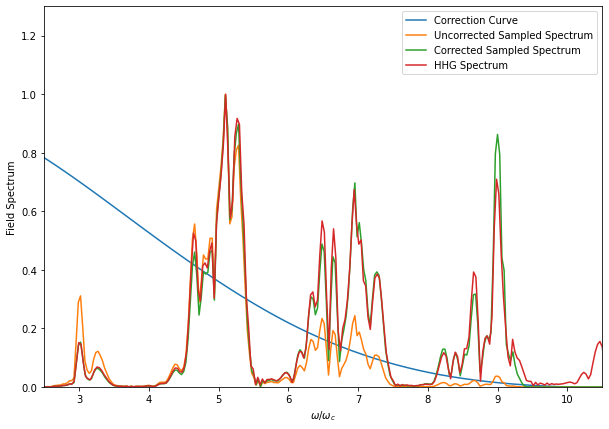

In [14]:
# -- Get the peaks fo the first +/-N harmonics:
N = 10 #Number of harmonics to correct
H_sampler_n = np.zeros(2*N + 1) + 0j #Sampler value at each harmonic (for envelope determination)
harm_corr_start = 0
harm_corr_end = 9.5

#Find H_sampler at each harmnic value n in [-N, N].
k = 0
for n in range(-N, N+1):

  index = np.where(w_drive/wc_drive <= n)[0][-1]
  H_sampler_n[k] = H_sampler[index]
  k = k + 1

#Get the correction frequency response interpolated on the same frequency
#axis as harmonic_pulse_simulation...
f_correction = interpolate.interp1d(np.arange(-N, N+1),
                                    np.abs(H_sampler_n),
                                    kind='cubic') #interp function
w_correction_range = np.where((w_J_corr/wc_drive < N)&(w_J_corr/wc_drive > -N))
  #index range where these harmonics are located
w_correction_norm = w_J_corr[w_correction_range]/wc_drive #Get relevant frequency points
correction = f_correction(w_correction_norm) #Now determine the correction curve
correction = correction/correction.max()


F_sampled, F_sampled_f = load.cutSpectralRegion(w_J_corr/wc_drive, 
                                                    J_corr_f/(np.abs(J_corr_f)).max(), 
                                                    harm_corr_start, harm_corr_end)

J_corr_f_corrected = J_corr_f
J_corr_f_corrected[w_correction_range] = (J_corr_f[w_correction_range]/correction)/(np.abs(J_corr_f[w_correction_range]/correction)).max()
F_sampled_corrected, F_sampled_corrected_f = load.cutSpectralRegion(np.fft.fftshift(w_J_corr/wc_drive), 
                                                    np.fft.fftshift(J_corr_f_corrected), 
                                                    harm_corr_start, harm_corr_end)

#-- Plot the original and corrected spectra, along with the correction factor curve
fig = plt.figure()
fig.set_size_inches(10, 7)
ax = []
k = 0    
ax.append(fig.add_subplot(1, 1, 1))

ax[k].plot(w_correction_norm, np.abs(correction), label='Correction Curve')

ax[k].plot(w_J_corr/wc_drive, np.abs(F_sampled_f),
     label='Uncorrected Sampled Spectrum')

ax[k].plot(w_J_corr/wc_drive, np.fft.fftshift(np.abs(F_sampled_corrected_f)), 
           label='Corrected Sampled Spectrum')

ax[k].plot(w_simulation/wc_drive, np.abs(simulation_f)/(np.abs(simulation_f)).max(),
     label='HHG Spectrum')

ax[k].set_xlim(2.5, 10.5)
ax[k].set_ylim(0, 1.3)
ax[k].legend()
ax[k].set_xlabel('$\omega/\omega_c$')
ax[k].set_ylabel('Field Spectrum');

### Gabor Transform -- High Spectral + High Temporal Resolution Time-Freq. Analysis

Here we compute the Gabor Transforms (basically STFTs having Gaussian windows).  This enables us to compare in a more complete and visual way the quality of the sampled waveform and how well it matches to the true waveform from simulation.

In [15]:
T = 2*np.pi/w0 #in atomic units
dt = (tau_range[1] - tau_range[0])*1e-15*pca.tcon
nperseg_spec = np.ceil(T/dt) + 1
noverlap_spec = np.floor(nperseg_spec/2.0)

#Calculate spectrogram
#f_spec, t_spec, spectrogram = stft(tddft_data['F_gen'], fs = pca.tcon/dt/1e15, 
#                           nperseg=3*nperseg_spec, window=('gaussian', nperseg_spec*3))

f_spec, t_spec, spectrogram = stft(F_sampled_corrected, fs = pca.tcon/dt/1e15, 
                                nperseg=nperseg_spec*5,
                                noverlap=nperseg_spec*4.9,
                                window=('gaussian', nperseg_spec*0.35))


f_harm = w0*pca.tcon/2/np.pi/1e15 #harmonic frequency
f_norm = f_spec/f_harm #Normalized by harmonic order
c_norm = np.max(np.abs(spectrogram[np.where(f_norm >= 5), :]))
spectrogram = spectrogram/c_norm


#Store data for later plotting after this analysis:
spectrogram_sampled = spectrogram
f_norm_sampled = f_norm
t_spec_sampled = t_spec + tau_range[0]

In [16]:
T = 2*np.pi/w0 #in atomic units
dt = t[1] - t[0]
nperseg_spec = np.ceil(T/dt) + 1
noverlap_spec = np.floor(nperseg_spec/2.0)

#Calculate spectrogram
#f_spec, t_spec, spectrogram = stft(tddft_data['F_gen'], fs = pca.tcon/dt/1e15, 
#                           nperseg=3*nperseg_spec, window=('gaussian', nperseg_spec*3))

# f_spec, t_spec, spectrogram = stft(tddft_data_2_high['F_gen'], fs = pca.tcon/dt/1e15, 
#                                 nperseg=nperseg_spec*5,
#                                 noverlap=nperseg_spec*4.9,
#                                 window=('gaussian', nperseg_spec*0.35))

f_spec, t_spec, spectrogram = stft(F_gen_region, fs = pca.tcon/dt/1e15, 
                                nperseg=nperseg_spec*5,
                                noverlap=nperseg_spec*4.9,
                                window=('gaussian', nperseg_spec*0.35))



f_harm = w0*pca.tcon/2/np.pi/1e15 #harmonic frequency
f_norm = f_spec/f_harm #Normalized by harmonic order
c_norm = np.max(np.abs(spectrogram[np.where(f_norm >= 5), :]))
spectrogram = spectrogram/c_norm

#Store data for later plotting after this analysis:
spectrogram_simulated = spectrogram
f_norm_simulated = f_norm
t_spec_simulated = t_spec + t_fs_centered[0]

### Create the Final Plot

This plot compares the full HH and time-sampled waveforms.  Gabor transforms are used to demonstrate that the full time-frequency information up to the 9th harmonic can be retrieved via solid-state sampling as performed in \[[Bionta *et al.*, Nature Photonics volume 15, pages 456–460 (2021)](https://www.nature.com/articles/s41566-021-00792-0)\]

Other methods such as TIP-TOE \[[Cho *et al*, Scientific Reports volume 9, Article number: 16067 (2019)](https://www.nature.com/articles/s41598-019-52237-y)\] or NPS \[[Sederberg *et al.*, Nature Communications volume 11, Article number: 430 (2020)](https://www.nature.com/articles/s41467-019-14268-x)\] could be used.

#### V1 -- Square Plot

/tmp/ipykernel_2324088/1078529448.py:57: RuntimeWarning: divide by zero encountered in log
  np.log(np.abs(spectrogram_simulated)**2).transpose(),


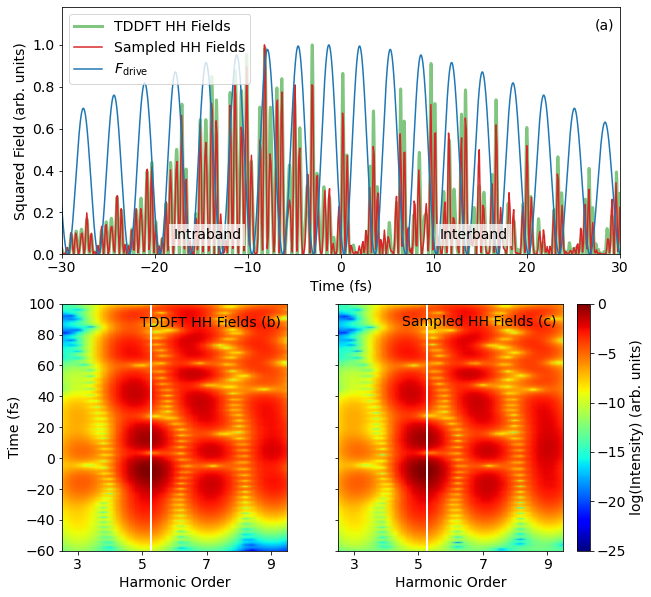

In [17]:
fig = plt.figure()
fig.set_size_inches(10, 10)

gs = fig.add_gridspec(2,2, width_ratios=(1, 1.25))
ax1 = fig.add_subplot(gs[0, :])

t_cycle_center = 0
t_range = 60

t_fs_center = (t_fs[-1] + t_fs[0])/2.0

plt.plot(t_fs_centered, (F_gen_region/np.abs(F_gen_region).max())**2, 
         label='TDDFT HH Fields',
         color='tab:green',
         linewidth=3.0, alpha=0.6)
plt.plot(tau_range, (F_sampled_corrected/np.abs(F_sampled_corrected).max())**2, 
         label='Sampled HH Fields',
         color='tab:red')
plt.plot(tddft_data_2_high['t_drive']*1e15/pca.tcon - t_fs_center, 
         tddft_data_2_high['F_drive']**2, 
         label=r'$F_\mathrm{drive}$',
         color='tab:blue')


plt.legend(fontsize=14, loc='upper left')

plt.xlim(t_cycle_center - t_range/2.0, t_cycle_center + t_range/2.0)
plt.ylim(0, 1.18)
plt.xlabel('Time (fs)', fontsize=14)
plt.ylabel('Squared Field (arb. units)', fontsize=14)
plt.tick_params(labelsize=14)

#Labeling and look
plt.text(0.99, 0.925, '(a)', 
         horizontalalignment='right',
         verticalalignment='center', 
         transform=ax1.transAxes,
         fontsize=14,
         bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))
plt.text(0.20, 0.05, 'Intraband', 
         horizontalalignment='left',
         verticalalignment='bottom', 
         transform=ax1.transAxes,
         fontsize=14,
         bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))
plt.text(0.80, 0.05, 'Interband', 
         horizontalalignment='right',
         verticalalignment='bottom', 
         transform=ax1.transAxes,
         fontsize=14,
         bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))


ax2 = fig.add_subplot(gs[1, 0])

plt.pcolormesh(f_norm_simulated, t_spec_simulated, 
               np.log(np.abs(spectrogram_simulated)**2).transpose(), 
               shading='gouraud', cmap='jet',
               rasterized='true')


plt.xlabel('Harmonic Order', fontsize=14)
plt.ylabel('Time (fs)', fontsize=14)
#cbar = plt.colorbar()
#plt.clim(-20, -5)
plt.clim(-25, 0)
plt.ylim(-60, 100)
plt.xlim(2.5, 9.5)

plt.tick_params(labelsize=14)
ax2.set_xticks([3,5,7,9])

photon_energy = f_harm*1e15*2*np.pi*pcSI.hbar/pcSI.evcon #Find photon energy of driver in eV
plt.axvline(BG/photon_energy, linewidth=2, color='white');

plt.text(0.97, 0.925, 'TDDFT HH Fields (b)', 
         horizontalalignment='right',
         verticalalignment='center', 
         transform=ax2.transAxes,
         fontsize=14,
         color='black',
         bbox=dict(facecolor='white', alpha=0.0, edgecolor='none'))

ax3 = fig.add_subplot(gs[1, 1])

plt.pcolormesh(f_norm_sampled, t_spec_sampled, 
               np.log(np.abs(spectrogram_sampled)**2).transpose(), 
               shading='gouraud', cmap='jet',
               rasterized='true')


plt.xlabel('Harmonic Order', fontsize=14)

cbar = plt.colorbar()

plt.clim(-25, 0)
plt.ylim(-60, 100)
plt.xlim(2.5, 9.5)

plt.tick_params(labelsize=14)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel('log(Intensity) (arb. units)', fontsize=14)

#Turn off y-label of right plot as this axis is shared:
plt.tick_params('y', labelleft=False)
ax3.set_xticks([3,5,7,9])


photon_energy = f_harm*1e15*2*np.pi*pcSI.hbar/pcSI.evcon #Find photon energy of driver in eV
plt.axvline(BG/photon_energy, linewidth=2, color='white')

plt.text(0.97, 0.925, 'Sampled HH Fields (c)', 
         horizontalalignment='right',
         verticalalignment='center', 
         transform=ax3.transAxes,
         fontsize=14,
         color='black',
         bbox=dict(facecolor='white', alpha=0.0, edgecolor='none'));

plt.savefig('sampled-vs-tddft-fields-2-um-high.pdf', bbox_inches='tight');
plt.savefig('sampled-vs-tddft-fields-2-um-high.png', bbox_inches='tight', dpi=300);

#### V2 -- Wide Plot

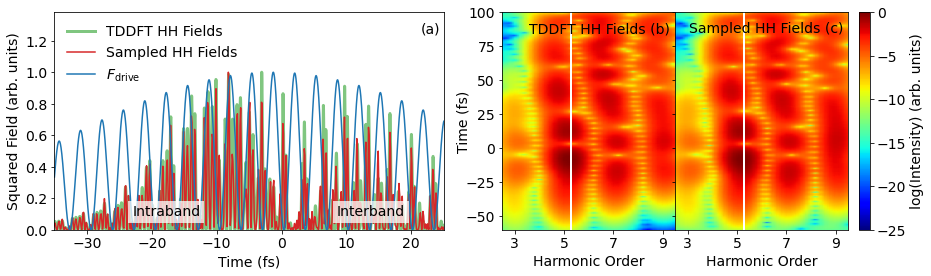

In [18]:
fig = plt.figure()
fig.set_size_inches(15, 4)

gs = fig.add_gridspec(1,2, width_ratios=(1, 1), wspace=0.15)
gs1 = gs[0, 1].subgridspec(1, 2, width_ratios=(1, 1.25), hspace=0.0, wspace=0.0)

ax1 = fig.add_subplot(gs[0, 0])

t_cycle_center = -5
t_range = 60

t_fs_center = (t_fs[-1] + t_fs[0])/2.0

plt.plot(t_fs_centered, (F_gen_region/np.abs(F_gen_region).max())**2, 
         label='TDDFT HH Fields',
         color='tab:green',
         linewidth=3.0, alpha=0.6)
plt.plot(tau_range, (F_sampled_corrected/np.abs(F_sampled_corrected).max())**2, 
         label='Sampled HH Fields',
         color='tab:red')
plt.plot(tddft_data_2_high['t_drive']*1e15/pca.tcon - t_fs_center, 
         tddft_data_2_high['F_drive']**2, 
         label=r'$F_\mathrm{drive}$',
         color='tab:blue')


plt.legend(fontsize=14, loc='upper left', frameon=False)

plt.xlim(t_cycle_center - t_range/2.0, t_cycle_center + t_range/2.0)
plt.ylim(0, 1.38)
plt.xlabel('Time (fs)', fontsize=14)
plt.ylabel('Squared Field (arb. units)', fontsize=14)
plt.tick_params(labelsize=14)

#Labeling and look
plt.text(0.99, 0.925, '(a)', 
         horizontalalignment='right',
         verticalalignment='center', 
         transform=ax1.transAxes,
         fontsize=14,
         bbox=dict(facecolor='white', alpha=0.0, edgecolor='none'))
plt.text(0.20, 0.05, 'Intraband', 
         horizontalalignment='left',
         verticalalignment='bottom', 
         transform=ax1.transAxes,
         fontsize=14,
         bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))
plt.text(0.9, 0.05, 'Interband', 
         horizontalalignment='right',
         verticalalignment='bottom', 
         transform=ax1.transAxes,
         fontsize=14,
         bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))


ax2 = fig.add_subplot(gs1[0, 0])

plt.pcolormesh(f_norm_simulated[0:50], t_spec_simulated, 
               np.log(np.abs(spectrogram_simulated[0:50, :])**2).transpose(), 
               shading='gouraud', cmap='jet',
               rasterized='true')


plt.xlabel('Harmonic Order', fontsize=14)
plt.ylabel('Time (fs)', fontsize=14, labelpad=-5)
#cbar = plt.colorbar()
#plt.clim(-20, -5)
plt.clim(-25, 0)
plt.ylim(-60, 100)
plt.xlim(2.5, 9.5)

plt.tick_params(labelsize=14)
ax2.set_xticks([3,5,7,9])

photon_energy = f_harm*1e15*2*np.pi*pcSI.hbar/pcSI.evcon #Find photon energy of driver in eV
plt.axvline(BG/photon_energy, linewidth=2, color='white');

plt.text(0.97, 0.925, 'TDDFT HH Fields (b)', 
         horizontalalignment='right',
         verticalalignment='center', 
         transform=ax2.transAxes,
         fontsize=14,
         color='black',
         bbox=dict(facecolor='white', alpha=0.0, edgecolor='none'))

ax3 = fig.add_subplot(gs1[0, 1])

plt.pcolormesh(f_norm_sampled, t_spec_sampled, 
               np.log(np.abs(spectrogram_sampled)**2).transpose(), 
               shading='gouraud', cmap='jet',
               rasterized='true')


plt.xlabel('Harmonic Order', fontsize=14)

cbar = plt.colorbar()

plt.clim(-25, 0)
plt.ylim(-60, 100)
plt.xlim(2.5, 9.5)

plt.tick_params(labelsize=14)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel('log(Intensity) (arb. units)', fontsize=14)

#Turn off y-label of right plot as this axis is shared:
plt.tick_params('y', labelleft=False)
ax3.set_xticks([3,5,7,9])


photon_energy = f_harm*1e15*2*np.pi*pcSI.hbar/pcSI.evcon #Find photon energy of driver in eV
plt.axvline(BG/photon_energy, linewidth=2, color='white')

plt.text(0.97, 0.925, 'Sampled HH Fields (c)', 
         horizontalalignment='right',
         verticalalignment='center', 
         transform=ax3.transAxes,
         fontsize=14,
         color='black',
         bbox=dict(facecolor='white', alpha=0.0, edgecolor='none'));

plt.savefig('sampled-vs-tddft-fields-2-um-high-wide.pdf', bbox_inches='tight');
plt.savefig('sampled-vs-tddft-fields-2-um-high-wide.png', bbox_inches='tight', dpi=300);